## 排序 （Ranking）

### 包点图 （Dot Plot）

包点图表传达了项目的排名顺序，并且由于它沿水平轴对齐，因此您可以更容易地看到点彼此之间的距离。

### 导入所需要的库

In [1]:
import numpy as np              # 导入numpy库
import pandas as pd             # 导入pandas库
import matplotlib as mpl        # 导入matplotlib库
import matplotlib.pyplot as plt
import seaborn as sns           # 导入seaborn库

### 设定图像各种属性

In [2]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,      # 设置子图上的标题字体
            'legend.fontsize': med,     # 设置图例的字体
            'figure.figsize': (16, 10), # 设置图像的画布
           'axes.labelsize': med,       # 设置标签的字体
            'xtick.labelsize': med,     # 设置x轴上的标尺的字体
            'ytick.labelsize': med,     # 设置整个画布的标题字体
          'figure.titlesize': large}  
plt.rcParams.update(params)             # 更新默认属性
plt.style.use('seaborn-whitegrid')      # 设定整体风格
sns.set_style("white")                  # 设定整体背景风格

### 测试版本

In [3]:
print(mpl.__version__)
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

3.1.0
0.9.0
0.24.2
1.16.4


### 程序代码

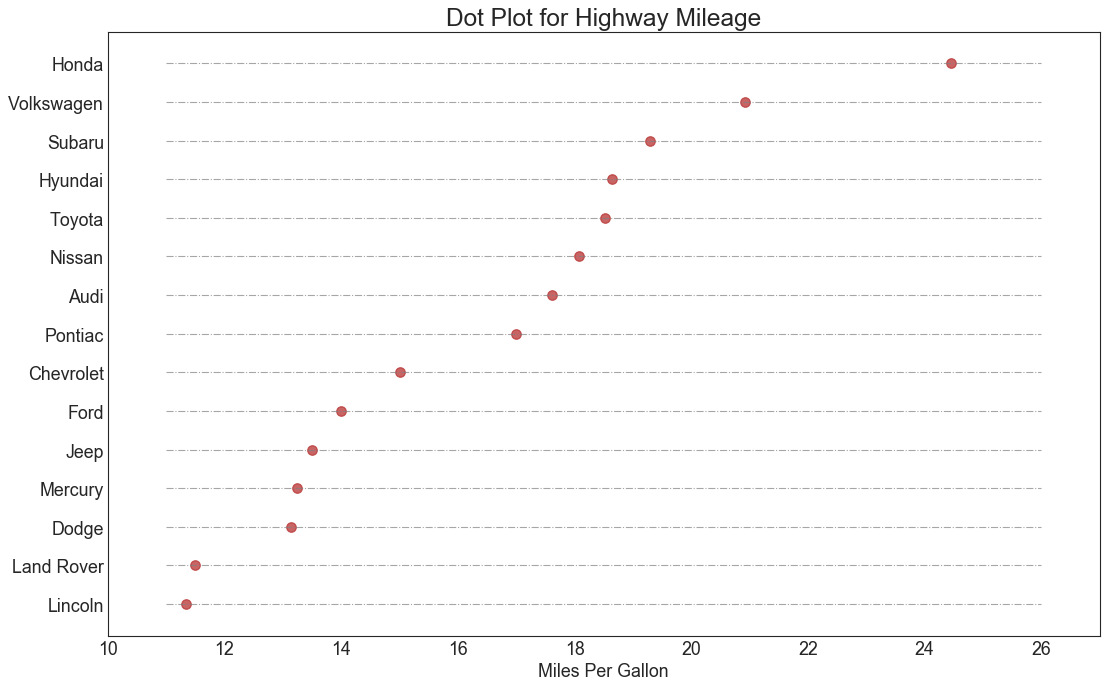

In [4]:
# step1:导入数据
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x:x.mean())
df.sort_values('cty', inplace = True)    # 对'mpg_z这一列数据进行排序
df.reset_index(inplace = True)           # 对排序后的数据重置索引

# step2: 绘制棒棒糖图
    # 创建画布对象以及子图对象
fig,ax = plt.subplots(figsize = (16, 10),    # 画布尺寸
                     facecolor = 'white',    # 画布颜色
                     dpi = 80)               # 分辨率
    # 绘制柱状图
ax.hlines(y=df.index,                   # 纵坐标
          xmin=11,                      # 柱状图在x轴的起点  
          xmax=26,                      # 柱状图在y轴的起点 
          color='gray',                 # 柱状图的颜色
          alpha=0.7,                    # 透明度
          linewidth=1,                  # 线宽 
          linestyles='dashdot')         # 柱状图风格
    # 绘制柱形图上的散点
ax.scatter(y=df.index,                  # 纵坐标
           x=df.cty,                    # 横坐标
           s=75,                        # 散点的尺寸
           color='firebrick',           # 颜色
           alpha=0.7)                   # 透明度

# step3：装饰
    # 设置标题、纵坐标的范围、横纵坐标的标题
ax.set_title('Dot Plot for Highway Mileage',                    # 设置标题以及字体大小
             fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')                               # 设置x轴标签     
ax.set_yticks(df.index)                                         # 设置y轴标尺刻度 
ax.set_yticklabels(df.manufacturer.str.title(),                 # 刻度标尺的内容(所有单词都是以大写开始，其余字母均为小写)
                   fontdict={'horizontalalignment': 'right'})   # 相对于刻度标水平对齐，且设置字体尺寸
ax.set_xlim(10, 27)                                             # 设置x轴范围   
plt.show()                                                      # 显示图像